In [ ]:
import pandas as pd
import numpy as np
from IPython.display import display
df = pd.read_excel("OnlineRetail.xlsx")
df_ulke = df.groupby('Country')
print("Ülke Sayısı")
print(df_ulke.groups.keys())
print("Ülke sayısı: " + str(df_ulke.ngroups))




Ülke Sayısı
dict_keys(['Australia', 'Austria', 'Bahrain', 'Belgium', 'Brazil', 'Canada', 'Channel Islands', 'Cyprus', 'Czech Republic', 'Denmark', 'EIRE', 'European Community', 'Finland', 'France', 'Germany', 'Greece', 'Hong Kong', 'Iceland', 'Israel', 'Italy', 'Japan', 'Lebanon', 'Lithuania', 'Malta', 'Netherlands', 'Norway', 'Poland', 'Portugal', 'RSA', 'Saudi Arabia', 'Singapore', 'Spain', 'Sweden', 'Switzerland', 'USA', 'United Arab Emirates', 'United Kingdom', 'Unspecified'])
Ülke sayısı: 38


# Yeni Bölüm

In [ ]:
import pandas as pd
import numpy as np
from IPython.display import display
df = pd.read_excel("OnlineRetail.xlsx")
df_customer = df.groupby('CustomerID')
print("Farklı Müşteri Sayısı")
print("Müşteri sayısı: " + str(df_customer.ngroups))


Farklı Müşteri Sayısı
Müşteri sayısı: 4372


In [ ]:
import pandas as pd
import numpy as np
from IPython.display import display
df = pd.read_excel("OnlineRetail.xlsx")
unique_values_count = df['StockCode'].nunique()
print("Kaç farklı ürün vardır:")
print(unique_values_count)


Kaç farklı ürün vardır:
4070


In [ ]:
import pandas as pd
import numpy as np
from IPython.display import display
df = pd.read_excel("OnlineRetail.xlsx")
df["Total"] = df["Quantity"] * df["UnitPrice"]
toplam = df["Total"].sum()
print(toplam)

9747747.933999998


In [ ]:
import pandas as pd
import numpy as np
from IPython.display import display
df = pd.read_excel("OnlineRetail.xlsx")
negatif_quantity = df[df["Quantity"] < 0]["Quantity"].count()
def multiply_columns(row):
    if row["Quantity"] < 0:
        return row["Quantity"] * row["UnitPrice"]
    return 0
df["sum"] = df.apply(multiply_columns, axis=1)
sum = df["sum"].sum()
print( "toplam" , sum * -1 ," dolarlık ürün iadesi yapılmıştır")
print(negatif_quantity ," adet ürün iade edilmiştir")

toplam 896812.4899999998  dolarlık ürün iadesi yapılmıştır
10624  adet ürün iade edilmiştir


In [ ]:
import pandas as pd

df = pd.read_excel("OnlineRetail.xlsx")
tarihler = df["InvoiceDate"].tolist()

aynı_tarihler = []
for tarih in tarihler:
    if tarih not in aynı_tarihler:
        aynı_tarihler.append(tarih)

en_cok_satis = 0
en_cok_satis_tarihi = ""
for tarih in aynı_tarihler:
    aynı_tarihteki_satirlar = df[df["InvoiceDate"] == tarih]
    satis_miktari = aynı_tarihteki_satirlar["Quantity"].sum()
    if satis_miktari > en_cok_satis:
        en_cok_satis = satis_miktari
        en_cok_satis_tarihi = tarih

print("En çok satış yapılan gün:" , en_cok_satis_tarihi)


En çok satış yapılan gün: 2011-12-09 09:15:00


InvoiceDate
April        289098
August       406199
December     568561
February     277989
January      308966
July         391116
June         341623
March        351872
May          380391
November     740286
October      570532
September    549817
Name: Quantity, dtype: int64


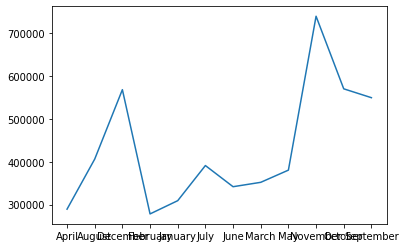

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel("OnlineRetail.xlsx")

df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])
df = df[df["InvoiceDate"] >= "12/01/2010"]

ay_ay_toplam = df.groupby(df["InvoiceDate"].dt.strftime('%B'))["Quantity"].sum()

print(ay_ay_toplam)
plt.plot(ay_ay_toplam)
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from IPython.display import display


data_set = pd.read_excel("OnlineRetail.xlsx")

data_set.head()
data_set['totalSales'] = data_set.Quantity * data_set.UnitPrice
data_set = data_set.drop(columns=['InvoiceNo', 'StockCode', 'Description', 'CustomerID', 'Country', 'Quantity', 'UnitPrice'])

data_set.InvoiceDate = pd.to_datetime(data_set.InvoiceDate)
dg = data_set.groupby(pd.Grouper(key='InvoiceDate', freq='1M')).sum()
dg['InvoiceDate'] = dg.index
dg.head()

dg['InvoiceDate'] =dg['InvoiceDate'].map(dt.datetime.toordinal)
dg.head()

x = dg.iloc[:, :-1].values
y = dg.iloc[:, 1].values

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.000001, random_state = 123, shuffle=1)

model = LinearRegression()
model.fit(X_train, y_train)

date_of_expected_sale = [pd.to_datetime(['2011-10-31']).map(dt.datetime.toordinal)]

prediction = model.predict(date_of_expected_sale)

print(prediction[0])



734312.0143772567
